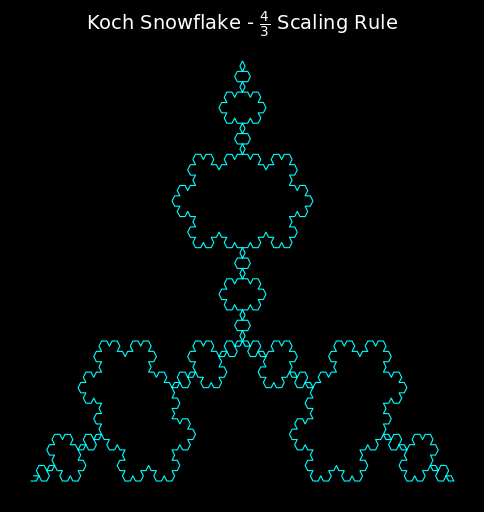

In [1]:
import matplotlib.pyplot as plt

# Recursive Koch function
def koch_curve(order, p1, p2):
    if order == 0:
        return [p1, p2]

    # Compute the new points
    p3 = ((2 * p1[0] + p2[0]) / 3, (2 * p1[1] + p2[1]) / 3)
    p5 = ((p1[0] + 2 * p2[0]) / 3, (p1[1] + 2 * p2[1]) / 3)
    
    dx, dy = p5[0] - p3[0], p5[1] - p3[1]
    p4 = (p3[0] + dx / 2 - dy * (3**0.5) / 2, p3[1] + dy / 2 + dx * (3**0.5) / 2)

    return (
        koch_curve(order - 1, p1, p3)[:-1] + 
        koch_curve(order - 1, p3, p4)[:-1] + 
        koch_curve(order - 1, p4, p5)[:-1] + 
        koch_curve(order - 1, p5, p2)
    )

# Generate the Koch Snowflake by applying the Koch curve to an equilateral triangle
def koch_snowflake(order):
    # Equilateral triangle points
    p1, p2, p3 = (0, 0), (1, 0), (0.5, (3**0.5) / 2)
    
    # Generate each side of the snowflake
    side1 = koch_curve(order, p1, p2)[:-1]
    side2 = koch_curve(order, p2, p3)[:-1]
    side3 = koch_curve(order, p3, p1)[:-1]
    
    return side1 + side2 + side3

# Set recursion depth
order = 4  # Increase for more complexity
snowflake = koch_snowflake(order)

# Plot
fig, ax = plt.subplots(figsize=(6, 6), facecolor="black")
ax.set_facecolor("black")
ax.plot(*zip(*snowflake), color="cyan", lw=0.8)

# Remove axis details
ax.set_xticks([])
ax.set_yticks([])
ax.axis("off")
ax.set_title(r"Koch Snowflake - $\frac{4}{3}$ Scaling Rule", color="white", fontsize=14)

plt.show()
